# Customer Churn Analysis

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np

In [3]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv'
df=pd.read_csv(url)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking null values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Encoding dataset

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.dtypes

customerID          int64
gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

# Visualization of DataSets

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='customerID', ylabel='Count'>

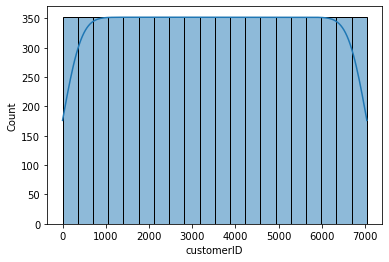

In [12]:
sns.histplot(x='customerID',data=df,bins=20,kde=True)

1    3555
0    3488
Name: gender, dtype: int64


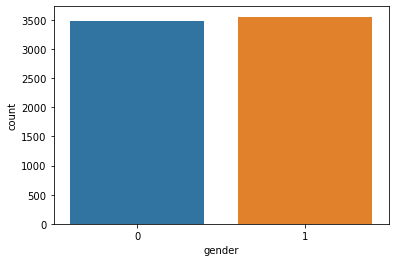

In [15]:
sns.countplot(x='gender',data=df)
print(df['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


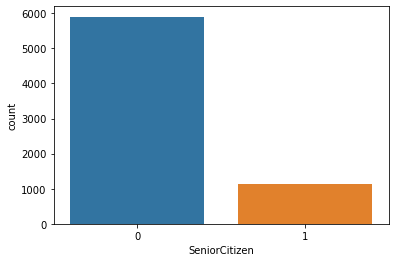

In [16]:
sns.countplot(x='SeniorCitizen',data=df)
print(df['SeniorCitizen'].value_counts())

0    3641
1    3402
Name: Partner, dtype: int64


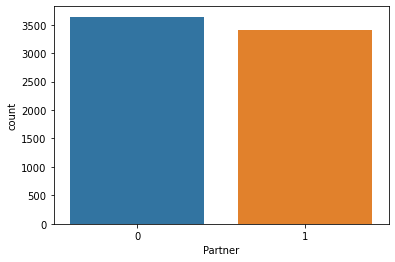

In [18]:
sns.countplot(x='Partner',data=df)
print(df['Partner'].value_counts())

0    4933
1    2110
Name: Dependents, dtype: int64


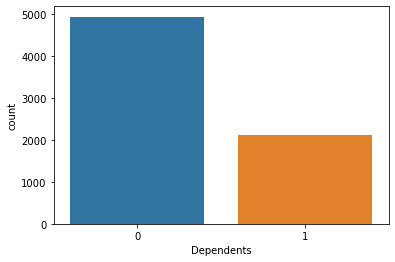

In [19]:
sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

<AxesSubplot:xlabel='tenure', ylabel='Count'>

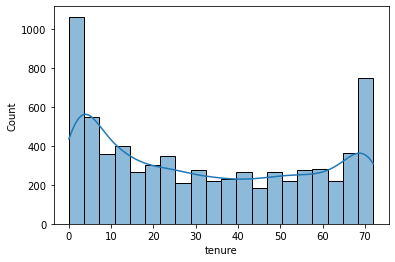

In [20]:
sns.histplot(x='tenure',data=df,bins=20,kde=True)

1    6361
0     682
Name: PhoneService, dtype: int64


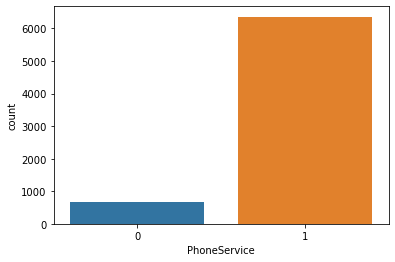

In [21]:
sns.countplot(x='PhoneService',data=df)
print(df['PhoneService'].value_counts())

0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64


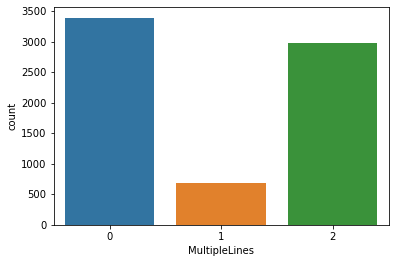

In [22]:
sns.countplot(x='MultipleLines',data=df)
print(df['MultipleLines'].value_counts())

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64


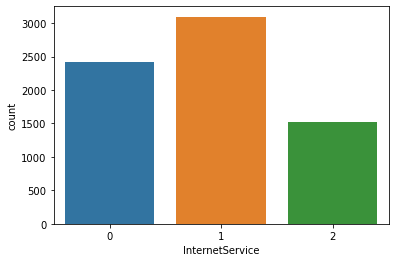

In [23]:
sns.countplot(x='InternetService',data=df)
print(df['InternetService'].value_counts())

0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64


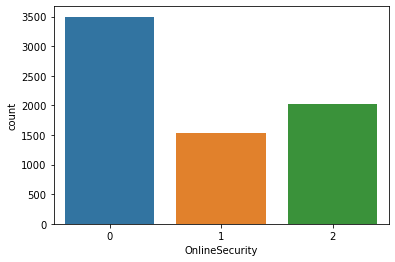

In [24]:
sns.countplot(x='OnlineSecurity',data=df)
print(df['OnlineSecurity'].value_counts())

0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64


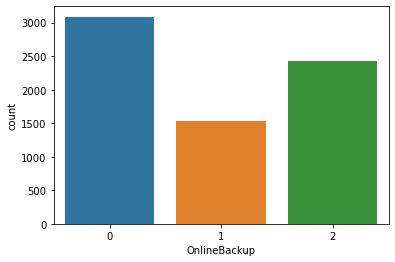

In [25]:
sns.countplot(x='OnlineBackup',data=df)
print(df['OnlineBackup'].value_counts())

0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64


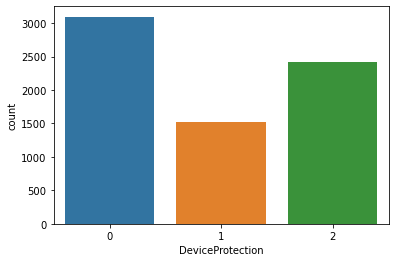

In [26]:
sns.countplot(x='DeviceProtection',data=df)
print(df['DeviceProtection'].value_counts())

0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64


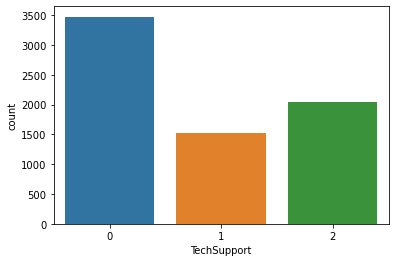

In [27]:
sns.countplot(x='TechSupport',data=df)
print(df['TechSupport'].value_counts())

0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64


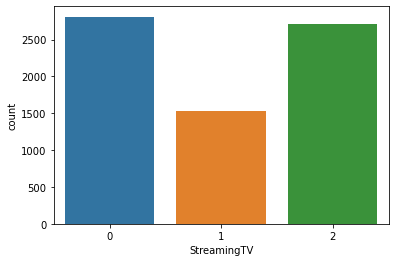

In [28]:
sns.countplot(x='StreamingTV',data=df)
print(df['StreamingTV'].value_counts())

0    2785
2    2732
1    1526
Name: StreamingMovies, dtype: int64


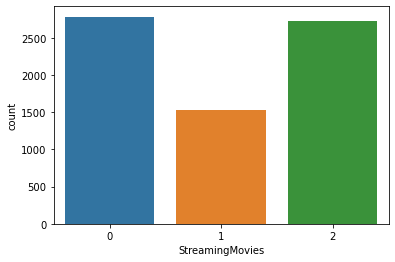

In [29]:
sns.countplot(x='StreamingMovies',data=df)
print(df['StreamingMovies'].value_counts())

0    3875
2    1695
1    1473
Name: Contract, dtype: int64


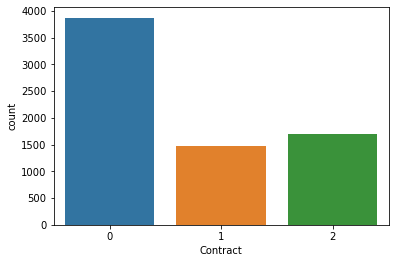

In [30]:
sns.countplot(x='Contract',data=df)
print(df['Contract'].value_counts())

1    4171
0    2872
Name: PaperlessBilling, dtype: int64


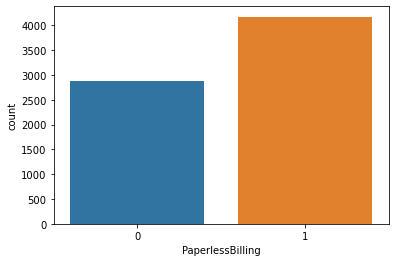

In [33]:
sns.countplot(x='PaperlessBilling',data=df)
print(df['PaperlessBilling'].value_counts())

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64


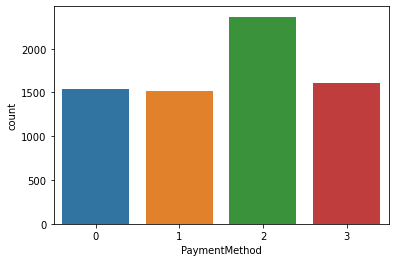

In [34]:
sns.countplot(x='PaymentMethod',data=df)
print(df['PaymentMethod'].value_counts())

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

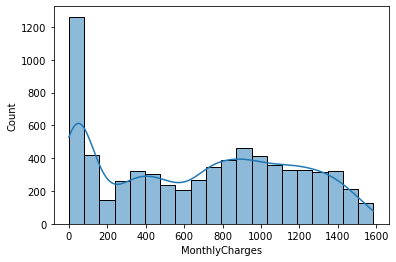

In [35]:
sns.histplot(x='MonthlyCharges',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

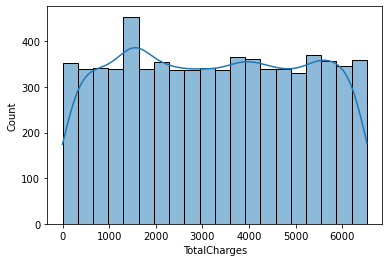

In [37]:
sns.histplot(x='TotalCharges',data=df,bins=20,kde=True)


0    5174
1    1869
Name: Churn, dtype: int64


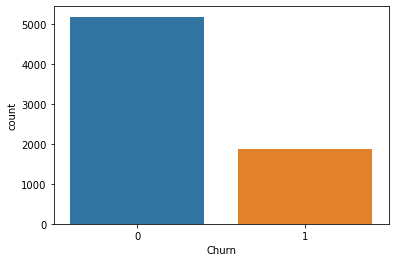

In [38]:
sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

# Describing dataset

In [39]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


<AxesSubplot:>

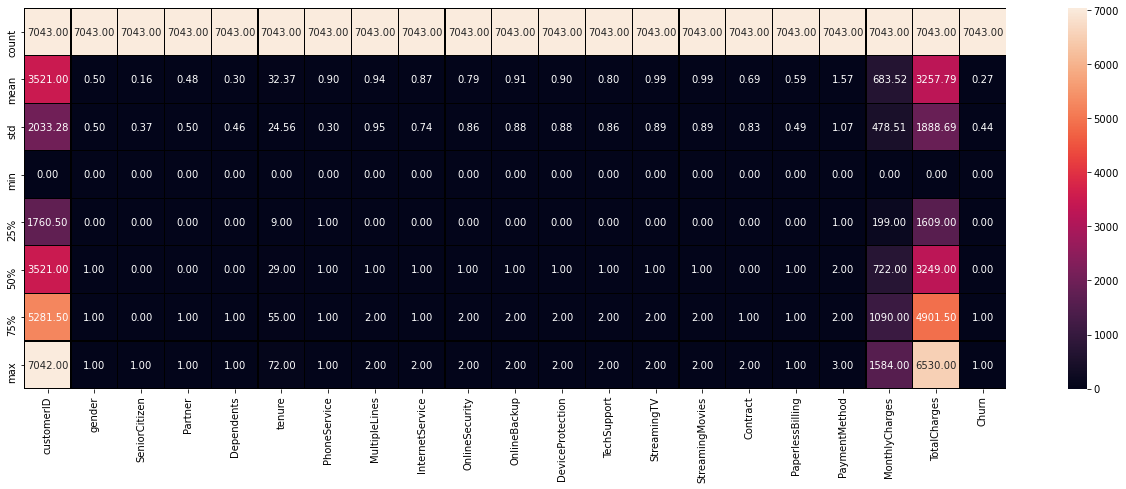

In [42]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidth=0.2,fmt='0.2f')

In [43]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.006266,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309


<AxesSubplot:>

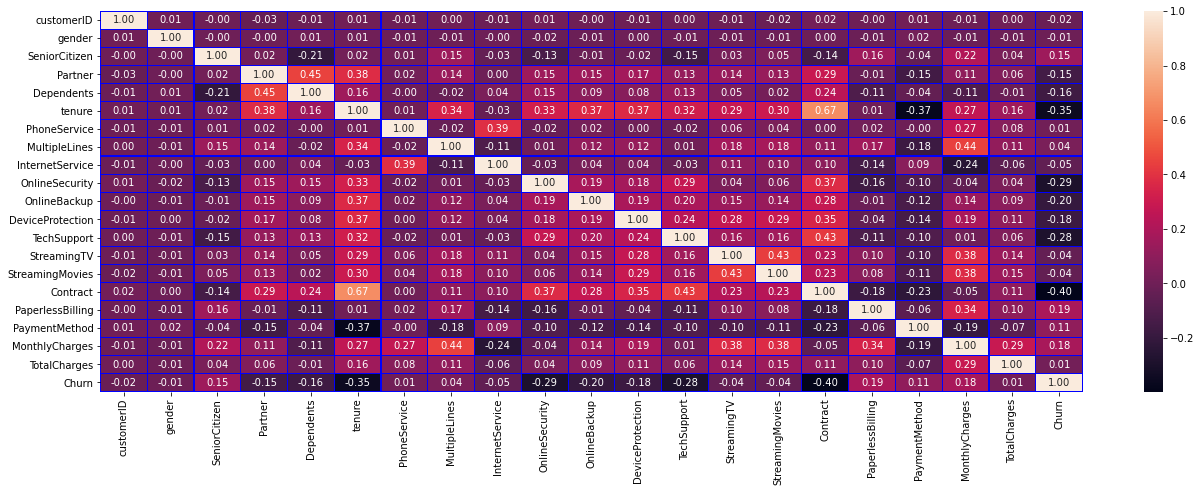

In [45]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linecolor='b',linewidth=0.1,fmt='0.2f')

# Outliers Checking

In [46]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges      0.014263
TotalCharges        0.015857
Churn               1.063031
dtype: float64

-/+ 0.5 is the threshold

<AxesSubplot:>

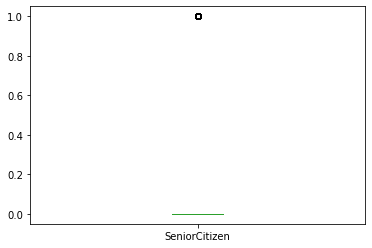

In [47]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

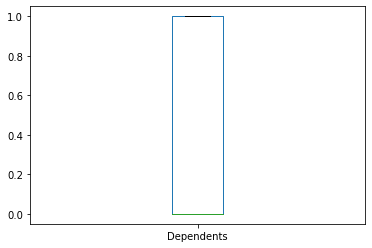

In [48]:
df['Dependents'].plot.box()

<AxesSubplot:>

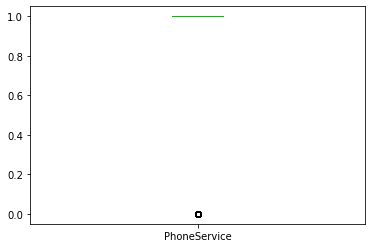

In [49]:
df['PhoneService'].plot.box()

<AxesSubplot:>

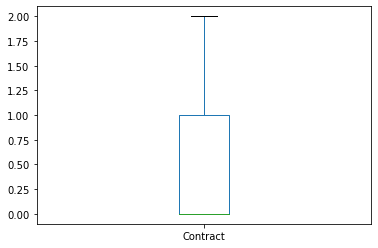

In [50]:
df['Contract'].plot.box()

<AxesSubplot:>

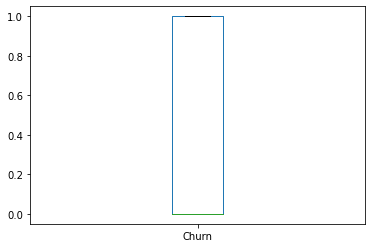

In [51]:
df['Churn'].plot.box()

# Outlier Removal

In [52]:
df.shape

(7043, 21)

In [53]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
Threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [55]:
df_new=df[(z<3).all(axis=1)]
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,1274,6104,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,1075,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,0,72,1,0,2,1,...,1,1,1,1,2,1,0,52,770,0
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


# Percentage DataLoss

In [57]:
Data_loss=((7043-6361)/7043)*100
Data_loss

9.683373562402386

# Separating Data in x and y

In [59]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [60]:
from sklearn.preprocessing import power_transform


In [61]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.06991541, -0.28254766],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.15927767, -0.88438245],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.28943076, -1.93709705],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.08752438, -0.02722738],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.38564885, -0.20008892],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.25632086,  1.08504111]])

# Scaling Dataset

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.06991541, -0.28254766],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.15927767, -0.88438245],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.28943076, -1.93709705],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.08752438, -0.02722738],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.38564885, -0.20008892],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.25632086,  1.08504111]])

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [65]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"The Model perform very well")
        print("At random state :-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100)
    

At random state  23 The Model perform very well
At random state :- 23
Training r2_score is :- 80.6354277600284
Testing r2_score is :- 80.62455642299503
At random state  61 The Model perform very well
At random state :- 61
Training r2_score is :- 80.65317713880015
Testing r2_score is :- 80.69552874378992
At random state  62 The Model perform very well
At random state :- 62
Training r2_score is :- 80.52893148739794
Testing r2_score is :- 80.48261178140525
At random state  77 The Model perform very well
At random state :- 77
Training r2_score is :- 80.65317713880015
Testing r2_score is :- 80.69552874378992
At random state  102 The Model perform very well
At random state :- 102
Training r2_score is :- 80.49343272985445
Testing r2_score is :- 80.48261178140525
At random state  125 The Model perform very well
At random state :- 125
Training r2_score is :- 80.81292154774583
Testing r2_score is :- 80.76650106458482
At random state  140 The Model perform very well
At random state :- 140
Trainin

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=842)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1034
           1       0.29      0.22      0.25       375

    accuracy                           0.65      1409
   macro avg       0.52      0.51      0.51      1409
weighted avg       0.62      0.65      0.63      1409



# Cross Validation of Dataset

In [75]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv :- ",j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv :-  2
Cross validation score is :- 80.57642624822171
accuracy_score is :- 81.19233498935415


At cv :-  3
Cross validation score is :- 80.59067878647988
accuracy_score is :- 81.19233498935415


At cv :-  4
Cross validation score is :- 80.54817768829693
accuracy_score is :- 81.19233498935415


At cv :-  5
Cross validation score is :- 80.51981176204916
accuracy_score is :- 81.19233498935415


At cv :-  6
Cross validation score is :- 80.3778272536578
accuracy_score is :- 81.19233498935415


At cv :-  7
Cross validation score is :- 80.49131794563868
accuracy_score is :- 81.19233498935415


At cv :-  8
Cross validation score is :- 80.43453655453513
accuracy_score is :- 81.19233498935415


At cv :-  9
Cross validation score is :- 80.44884601998203
accuracy_score is :- 81.19233498935415




Since Cross validation and accuracy score is almost same we are heading towards a good approach

In [76]:
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The cv score is: ",lsscore_selected,"\n The accuracy_score is: ",lss)


The cv score is:  0.8057642624822171 
 The accuracy_score is:  0.8119233498935415


# AUC ROC Curve

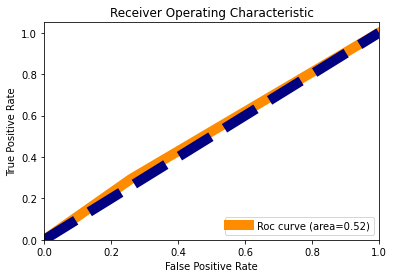

In [77]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



# Model Saving

In [78]:
import pickle
filename='Customerchurn.an'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [79]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com
                    

,original,predicted
0,0,0
1,1,1
2,1,0
3,0,0
4,1,0
...,...,...
1404,0,0
1405,0,0
1406,1,1
1407,0,0
